In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler


In [2]:
def visualize_clusters(combined_vectors, labels, Kc):
    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2)
    tsne_vectors = tsne.fit_transform(combined_vectors)

    # Visualize the clusters using scatter plot
    plt.scatter(Kc[:, 0], Kc[:, 1], color='red', marker='*', label='Centroids')
    plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], c=labels, label='Data Points')
    plt.title("Cluster Visualization")
    plt.legend()  # Add legend to differentiate centroids and data points
    plt.show()

def create_elbow_plot(combined_vectors):
    # Calculate the within-cluster sum of squares (WCSS) for a range of k values
    k_range = range(2, 100)
    wcss = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(combined_vectors)
        wcss.append(kmeans.inertia_)

    # Plot the elbow plot
    plt.plot(k_range, wcss)
    plt.title("Elbow Plot")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
    plt.show()
    
def calculate_cohesion(data, labels):
    cohesion_scores = []
    for cluster_label in np.unique(labels):
        cluster_data = data[labels == cluster_label]
        pairwise_distances = np.linalg.norm(cluster_data[:, np.newaxis] - cluster_data, axis=2)
        average_distance = np.mean(pairwise_distances)
        cohesion_scores.append(average_distance)
    return cohesion_scores

def calculate_separation(data, labels):
    separation_scores = []
    for cluster1_label in np.unique(labels):
        cluster1_data = data[labels == cluster1_label]
        for cluster2_label in np.unique(labels):
            if cluster1_label != cluster2_label:
                cluster2_data = data[labels == cluster2_label]
                pairwise_distances = np.linalg.norm(cluster1_data[:, np.newaxis] - cluster2_data, axis=2)
                average_distance = np.mean(pairwise_distances)
                separation_scores.append(average_distance)
    return separation_scores


In [3]:
with open('title_bert_embeddings.pkl', 'rb') as f:
    title_embeddings = pickle.load(f)

with open('abstract_bert_embeddings.pkl', 'rb') as f:
    abstract_embeddings = pickle.load(f)

In [4]:
title_embeddings = np.array(title_embeddings)
abstract_embeddings = np.array(abstract_embeddings)

# Combine the title and abstract embeddings
combined_embeddings = np.vstack((title_embeddings, abstract_embeddings))

In [6]:
print(combined_embeddings)

[[ 0.24021314  0.66669476  0.6395514  ... -0.37506363 -0.06366593
  -0.12442446]
 [ 0.30126035  0.6045452   0.40460783 ... -0.33561763 -0.00267397
  -0.2572105 ]
 [ 0.1786899   0.6085371   0.75771034 ... -0.32150438 -0.1120196
  -0.28715935]
 ...
 [ 0.13091761  0.5862531   0.65593684 ... -0.01512976 -0.07425743
  -0.45005926]
 [ 0.202217    0.5996707   0.6860274  ... -0.02764742 -0.12641056
  -0.34086886]
 [ 0.17260884  0.73726445  0.5940435  ...  0.05676374 -0.0841399
  -0.5092465 ]]


In [7]:
def calculate_inertia(data, labels, centers):
    inertia = 0
    for cluster_label in np.unique(labels):
        cluster_data = data[labels == cluster_label]
        inertia += np.sum(np.square(pairwise_distances(cluster_data, [centers[cluster_label]], metric='euclidean')))
    return inertia

def calculate_dunn_index(data, labels, centers):
    min_inter_cluster_distances = np.min([np.min(pairwise_distances(data[labels == i], data[labels != i])) for i in np.unique(labels)])
    max_intra_cluster_diameters = np.max([np.max(pairwise_distances(data[labels == i])) for i in np.unique(labels)])
    dunn_index = min_inter_cluster_distances / max_intra_cluster_diameters
    return dunn_index

In [7]:
'''# Set the desired silhouette score threshold
desired_silhouette_score = 0.7

# Initialize silhouettes with a value below the threshold
silhouettes = 0.5

# Specify the range of k values to evaluate
ks = range(2, 11)
cluster_centers_list = []

# Iterate until the silhouette score is greater than or equal to the threshold
while silhouettes < desired_silhouette_score:
    best_silhouette = 0  # Initialize the best silhouette score for the current iteration

    # Iterate over the range of k values
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(combined_embeddings)
        silhouette = silhouette_score(combined_embeddings, kmeans.labels_)

        # Check if the current silhouette score is better than the best so far
        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_k = k
            best_labels = kmeans.labels_
            best_cluster_centers = kmeans.cluster_centers_

    # Update the silhouette score for the current iteration
    silhouettes = best_silhouette

# Obtain y_predicted and cluster_centers for the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, n_init=50, max_iter=100)
kmeans.fit(combined_embeddings)
y_predicted = kmeans.labels_
cluster_centers = kmeans.cluster_centers_'''

'# Set the desired silhouette score threshold\ndesired_silhouette_score = 0.7\n\n# Initialize silhouettes with a value below the threshold\nsilhouettes = 0.5\n\n# Specify the range of k values to evaluate\nks = range(2, 11)\ncluster_centers_list = []\n\n# Iterate until the silhouette score is greater than or equal to the threshold\nwhile silhouettes < desired_silhouette_score:\n    best_silhouette = 0  # Initialize the best silhouette score for the current iteration\n\n    # Iterate over the range of k values\n    for k in ks:\n        kmeans = KMeans(n_clusters=k)\n        kmeans.fit(combined_embeddings)\n        silhouette = silhouette_score(combined_embeddings, kmeans.labels_)\n\n        # Check if the current silhouette score is better than the best so far\n        if silhouette > best_silhouette:\n            best_silhouette = silhouette\n            best_k = k\n            best_labels = kmeans.labels_\n            best_cluster_centers = kmeans.cluster_centers_\n\n    # Update the

In [8]:
# Perform iterative clustering with silhouette score as its metric
silhouettes = []
cluster_centers_list = []
ks = range(7, 10)  # Specify the range of k values to evaluate

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(combined_embeddings)
    silhouettes.append(silhouette_score(combined_embeddings, kmeans.labels_))
    cluster_centers_list.append(kmeans.cluster_centers_)

# Find the optimal number of clusters based on silhouette score
best_k = ks[silhouettes.index(max(silhouettes))]

# Obtain y_predicted and cluster_centers for the optimal number of clusters
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(combined_embeddings)
y_predicted = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

In [9]:
# Evaluate the clustering using silhouette score, cohesion, and separation
silhouette_avg = silhouette_score(combined_embeddings, kmeans.labels_)
cohesion_avg = calculate_cohesion(combined_embeddings, kmeans.labels_)
separation_avg = calculate_separation(combined_embeddings, kmeans.labels_)

print("Silhouette score:", silhouette_avg)
print("Cohesion:", cohesion_avg)
print("Separation:", separation_avg)

Silhouette score: 0.06766533
Cohesion: [3.3739927, 2.0912533, 3.9396708, 3.433867, 3.4682512, 1.997115, 3.744319, 3.4627159]
Separation: [5.177923, 4.2264743, 3.7159576, 3.8800232, 5.587181, 4.050528, 4.18441, 5.1779237, 6.3563457, 4.668696, 5.351402, 2.2470756, 6.2434106, 5.115749, 4.2264743, 6.3563447, 4.5286055, 4.271547, 6.7394686, 4.281464, 5.0743427, 3.7159574, 4.668696, 4.528605, 3.832713, 5.0407887, 4.5262055, 4.2086897, 3.8800235, 5.3514023, 4.271547, 3.8327124, 5.7593727, 4.2234473, 4.62584, 5.587181, 2.2470756, 6.7394686, 5.040788, 5.7593727, 6.6300073, 5.439165, 4.050528, 6.24341, 4.281464, 4.5262055, 4.2234473, 6.6300073, 4.8252206, 4.18441, 5.115749, 5.074343, 4.2086897, 4.62584, 5.439165, 4.8252206]


In [10]:
Kc = kmeans.cluster_centers_

In [11]:
print(Kc)

[[ 0.16885048  0.5397139   0.60875016 ... -0.2083898  -0.06229858
  -0.1851183 ]
 [ 0.12181153  0.67136157  0.6655947  ...  0.01347308 -0.04885203
  -0.48318416]
 [ 0.07853086  0.3922027   0.49012405 ... -0.18907431 -0.0645618
  -0.08622573]
 ...
 [ 0.14243257  0.66134995  0.62914926 ...  0.08393291 -0.01851218
  -0.4661882 ]
 [ 0.13847898  0.4999796   0.4778226  ... -0.28330377 -0.08803367
  -0.05043861]
 [ 0.04760128  0.47592068  0.48181927 ... -0.20364577  0.04899955
  -0.34408098]]


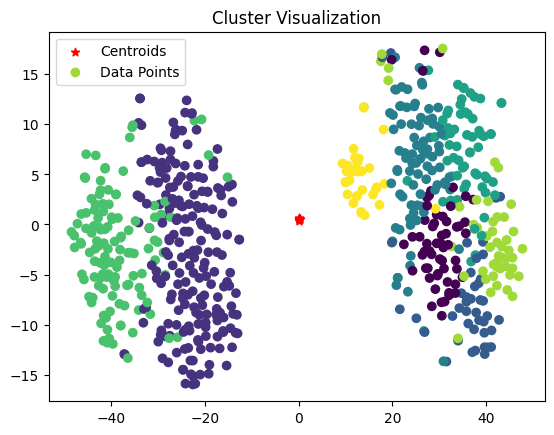

In [12]:
# Visualize the clusters
visualize_clusters(combined_embeddings, kmeans.labels_, Kc)

# Create the elbow plot
#create_elbow_plot(combined_embeddings)

In [14]:
# ... (previous code)

# Obtain y_predicted and cluster_centers for the optimal number of clusters
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(combined_embeddings)
y_predicted = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Generate labels for each cluster
cluster_labels = [f'Cluster_{i}' for i in range(best_k)]

# Assign a label to each data point based on the cluster it belongs to
generated_labels = [cluster_labels[label] for label in y_predicted]

# Add the generated labels to the result_data DataFrame
result_data['Generated_Label'] = generated_labels

# Display the DataFrame with the generated labels
display(result_data)


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


NameError: name 'result_data' is not defined

In [32]:
# ... (previous code)

# Obtain y_predicted and cluster_centers for the optimal number of clusters
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(combined_embeddings)
y_predicted = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Define a mapping between numeric labels and words
label_word_mapping = {
    0: 'LabelA',
    1: 'LabelB',
    2: 'LabelC',
    3: 'LabelD',
    4: 'LabelE',
    5: 'LabelF',
    6: 'LabelG',
    7: 'LabelH',
    # Add more labels as needed
}

# Map numeric labels to words
predicted_labels_words = [label_word_mapping.get(label, f'UnknownLabel_{label}') for label in y_predicted]

# Display the predicted labels in words
print(predicted_labels_words)


['LabelC', 'LabelC', 'LabelF', 'LabelF', 'LabelG', 'LabelD', 'LabelC', 'LabelF', 'LabelA', 'LabelC', 'LabelD', 'LabelF', 'LabelC', 'LabelG', 'LabelC', 'LabelD', 'LabelF', 'LabelG', 'LabelA', 'LabelE', 'LabelG', 'LabelE', 'LabelF', 'LabelF', 'LabelF', 'LabelE', 'LabelA', 'LabelA', 'LabelC', 'LabelD', 'LabelE', 'LabelA', 'LabelD', 'LabelD', 'LabelA', 'LabelG', 'LabelE', 'LabelF', 'LabelA', 'LabelF', 'LabelF', 'LabelD', 'LabelE', 'LabelA', 'LabelG', 'LabelF', 'LabelF', 'LabelE', 'LabelE', 'LabelA', 'LabelA', 'LabelA', 'LabelD', 'LabelC', 'LabelF', 'LabelE', 'LabelC', 'LabelD', 'LabelE', 'LabelE', 'LabelF', 'LabelF', 'LabelF', 'LabelC', 'LabelD', 'LabelC', 'LabelF', 'LabelE', 'LabelC', 'LabelF', 'LabelA', 'LabelF', 'LabelE', 'LabelF', 'LabelA', 'LabelA', 'LabelF', 'LabelF', 'LabelC', 'LabelF', 'LabelE', 'LabelE', 'LabelA', 'LabelF', 'LabelG', 'LabelA', 'LabelA', 'LabelC', 'LabelC', 'LabelC', 'LabelC', 'LabelG', 'LabelG', 'LabelC', 'LabelC', 'LabelG', 'LabelA', 'LabelD', 'LabelF', 'LabelD',